# **Lecture: Convolution Layer Introduction**

**(PLEASE CLEAR THE KERNEL IF YOU RUN THIS NOTEBOOK (once you are finished puzzling)**

In [1]:
# Import tensorflow.
import tensorflow as tf

# PIL (Pillow) for working with images.
import PIL
from PIL import Image , ImageOps

# Used for globbing up directories.
import glob

# The Data Tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Keras tools.
from tensorflow import keras

# Network type.
from tensorflow.keras import models 

# Layer information.
from tensorflow.keras import layers # import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# For editing images. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical

print("Tensorflow version:", tf.__version__)
print("Pandas version:", pd.__version__)
print("Keras version:", keras.__version__)
print("Pillow version:", PIL.__version__,"\n")

physical_devices = tf.config.list_physical_devices('GPU') 
print("GPU's:",physical_devices)
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

Tensorflow version: 2.1.0
Pandas version: 1.1.5
Keras version: 2.2.4-tf
Pillow version: 8.1.0 

GPU's: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [2]:
# Loading up the image (deer.jpg) and casting it to a numpy array.
# Assign it to X. 
X = np.array(Image.open("./deer.jpg"))

# Uncomment to see the numpy array
#print(X)

Use matshow to view the image. It is good to check the images to make sure they are what we expect.

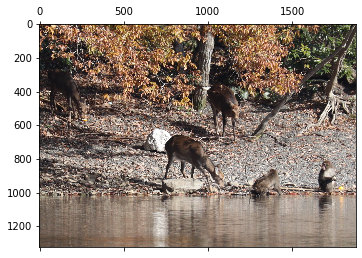

In [3]:
# visulatize the image. (Matplotlib)
plt.matshow(X)
plt.show()

In [4]:
# Check the shape to see the number of layers.
np.shape(X)

(1326, 1878, 3)

In [5]:
# reshape to feed into the model
X  = X.reshape((1, 1326, 1878, 3))

Setting up a network with one convolution layer. 

In [50]:
initializer = tf.keras.initializers.RandomNormal(seed=1337)

model = models.Sequential()
model.add(layers.Conv2D(10, input_shape = (1326, 1878, 3), kernel_size=(3 , 3), kernel_initializer = initializer, use_bias=False))

In [49]:
model.build()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1324, 1876, 10)    270       
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [10]:
Y_hat = model.predict(X)
np.shape(Y_hat)

(1, 1324, 1876, 10)

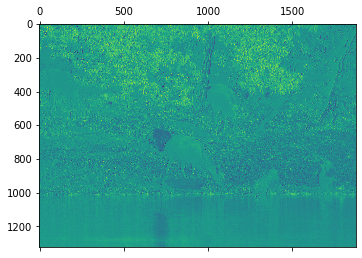

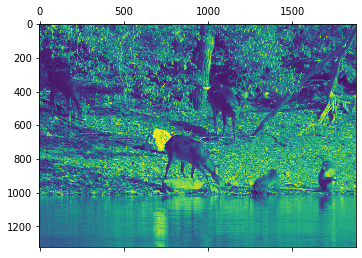

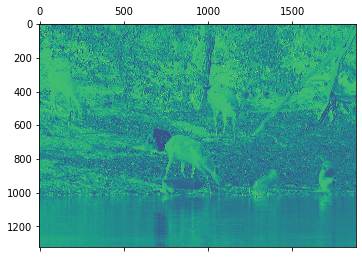

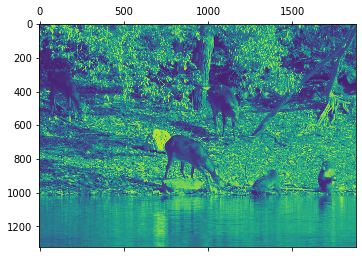

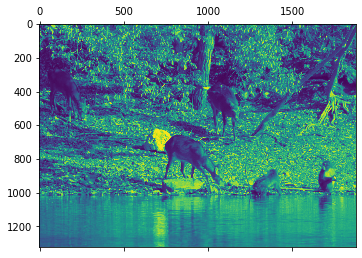

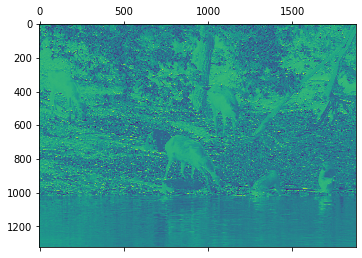

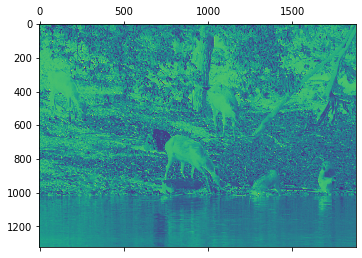

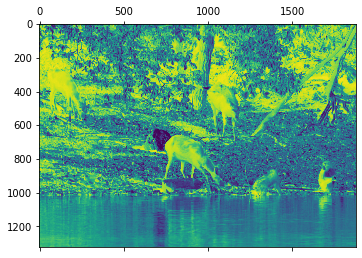

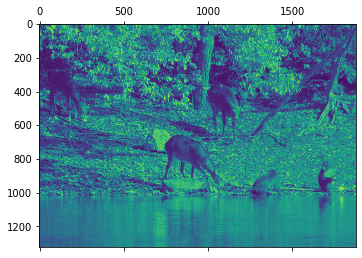

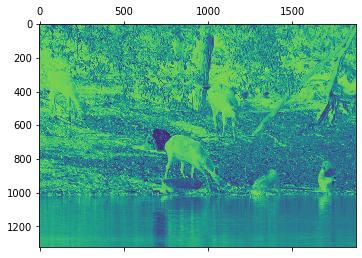

In [11]:
for i in range(np.shape(Y_hat)[3]):
    plt.matshow(Y_hat[0][:,:,i])

In [56]:
model.add(layers.MaxPooling2D(pool_size=(10,10)))

ValueError: Negative dimension size caused by subtracting 10 from 1 for 'max_pooling2d_7/MaxPool' (op: 'MaxPool') with input shapes: [?,1,1,10].

In [57]:
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1324, 1876, 10)    270       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 10)          0         
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [58]:
Y_hat = model.predict(X)
np.shape(Y_hat)

(1, 1, 1, 10)

In [59]:
for i in range(10):
    Y_hat = model.predict(X)

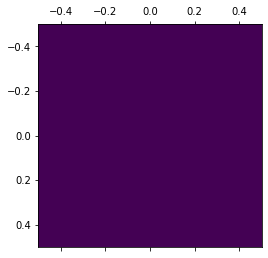

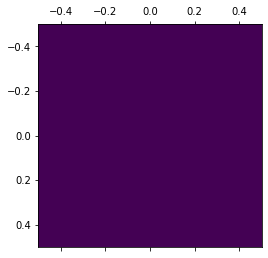

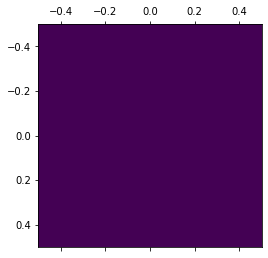

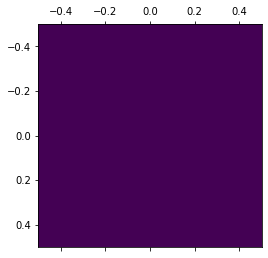

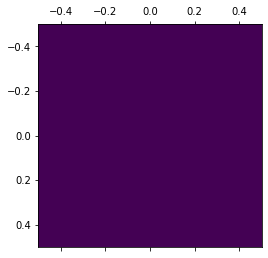

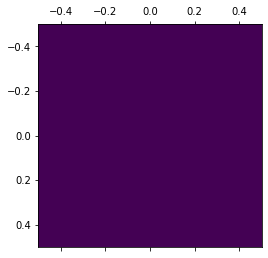

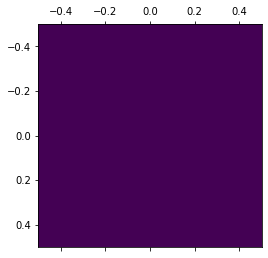

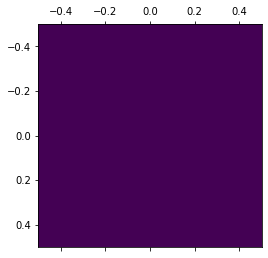

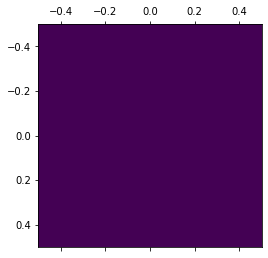

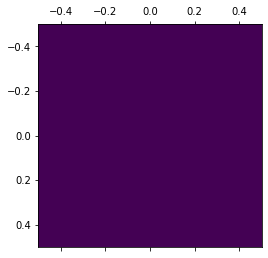

In [55]:
for i in range(np.shape(Y_hat)[3]):
    plt.matshow(Y_hat[0][:,:,i])